<a href="https://colab.research.google.com/github/felipecabueno/precos_apartamentos_sao_paulo/blob/main/precos_apartamentos_sao_paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0.0 - README.md**

### **Introducao ao projeto**

Quando comecei a procurar dados de imoveis para os meus estudos, o primeiro que surgiu foi o famoso California Housing Prices, que reúne informações sobre o preço, localização e planta de propriedades - tendo como fonte o senso de 1990 da Califórnia. Ele é muito bacana, mas como sempre me animo com as coisas, pensei: Já que estou querendo aprender, porque não desenvolver o meu próprio conjunto de dados? Então surgiu o Apartment prices in Sao Paulo - BR (2020), que como podem imaginar, conta com informações de APARTAMENTOS a venda na cidade de SÃO PAULO, originários de sites de anuncio e imobiliárias.

Este é o resultado, e a seguir conto um pouco do processo:

Não foi fornecido texto alternativo para esta imagem
Planejamento da coleta de informações
Desde o inicio não tinha a intenção de montar um banco de dados cobrindo todos os imoveis a venda, meu objetivo era ter imoveis de muitos bairros, com vários números de cômodos e um bom range de preços. Como os sites desse tipo são preparados para a busca por essas características, isso foi relativamente fácil, pois eu pude preparar minha raspagem de dados para que, em cada site, eu pudesse filtrar: Todas as zonas > Todos os bairros > Numero de Quartos > Faixas de preço.

O mais trabalhoso foi adequar o programa de raspagem para cada site, pois suas estruturas eram naturalmente diferentes. Por exemplo, eu poderia pegar uma lista dos bairros do maior site ou da prefeitura e substituir o ponto da url que faria essa busca, mas precisaria analisar como o nome é escrito no site (ex.: com ou sem traço) e não haveria garantia de que daria o match correto. Em vez disso, vi que muitos sites tem uma pagina com todos os bairros disponíveis e um link para a lista de imoveis de lá, pronto, já estava feito uma parte do trabalho, nessa página poderia filtrar pelo resto das características, cruzando todas.

Importante: Poderia ter reduzido o trabalho uns 75% se não usasse esses filtros e raspasse diretamente dos destaques de imoveis ou outra página gerada automaticamente, mas a ideia era ter variedade e isso garante que vou buscas imoveis, por exemplo: Num bairro menos valorizado, com 1 quarto e custando 2.000.000 de reais - tudo bem pode ser difícil, e até inexistente (meu robô poderia ter encontrado uma página vazia), mas se esse imóvel existisse eu o encontraria.

Tratando as tabelas do scraping
Depois de reunir vários .csv's, alguns com todos os campos certos, e outros sem algumas informações (as vezes por limitações do site mesmo), usei a coluna referente a descrição do anuncio, para completar os faltantes e confirmar as já existentes (fiz isso usando Regex).

Esse processo funcionou para cerca de 75%, o que considerei uma vitoria, já que agora tinha tabelas completas e pude junta-las formando um só arquivo. A partir daqui comecei o trabalho de limpeza do DF, já que as informações que selecionei eram básicas para a venda, não tinham muitos valores incompletos e resolvi deletar essas linhas.

A minha intenção era deixar os dados mais abrangentes possível, então depois de explora-los um pouco eliminei somente os erros gritantes, como: Imoveis com mais suítes do que quartos, valores surreais, etc ... Essa etapa exigiu uma pequisa mais profunda, pois, existem apartamentos de 1000m² em São Paulo, mas não por R$ 150.000; Há imoveis com 10 vagas de garagem, mas eles não tem 40m² (bom, pelo menos acho que não, há muitas opções no mercado haha).

Observação: No dataset final exclui as colunas de descrição e os links para os anúncios, pois não queria problemas com os sites anunciantes.

Acabou aqui? Quais são os próximos passos?
Com esse dataset pronto, eu comecei a pensar em outros pontos, como a diferença de preços por m² entre diferentes plantas (flats, kitnets, apartamentos padrão, luxo, AAA) no mesmo bairro. Alguns sites trazem essa denominação, mas que não segue nenhum padrão e não ajudam em nada. Será que conseguiríamos desenvolver um algoritmo que categorizasse isso E ainda viajando um pouco mais, porque não tentar usar processamento de imagens e ML, para identificar nas fotos, se os imoveis (paredes, portas, etc) estão desgastadas ou são novos? Fica um desafio, nem que seja uma tentativa falha, para os próximos estudos.

### **Sobre o dataset**

First of all, I make it clear that my goal was not to set up a database of the sale units; I wanted to create a dataframe close to my reality that was robust, varied, believable and of considerable size. Allowing me to deepen my studies in data science and machine learning.

This work was built with data scraping on pages of apartments for sale in the city of São Paulo-SP. The names of the neighborhoods were confirmed by the base of the Post Office, and later I worked as distances from the strings to eliminate different ways of writing the same name.

In the numerical columns, I did not impose any number (except in the suites, 0 when there was no such information in the property description), and I preferred to eliminate incomplete lines, and then look for other sources to fill some gaps. Ex .: Real estate agents specializing in luxury properties, for apartments with more than 5 bedrooms.

In short, all the work I did was not to mischaracterize any of the material, I just eliminated absurd entries such as: Very high or low values, price per m² unrealistic, very large discrepancy without a number of rooms in the same apartment, more numerous suites than dorms and etc. In other words, anything that would lead you to believe that a typo has occurred.

Columns: Neighborhood - Square meters - Bedrooms - Bathrooms - Suites - Parking spaces - Final price

Note: I deleted the columns with links from the pages, and the description text that usually accompanies the announcement (which served to complete / confirmed information in some cases) because I want to avoid conflicts with companies.

What determines the value of a property in São Paulo? How accurate can we predict the projected value of the sale, based on location, size and simple features?

The price per square meter for a family apartment is different from a single apartment, which is different from a luxury property. But what else can help in the future, in the task of predicting the sale value?

### **Legenda dos arquivos com sublegenda**

READMME  
.py  
.ipynb  
.csv  
> bairros 
> quartos  
> banheiros  
> suites  
> vagas  
> PRECO_MILHARES  
arquivos do deploy  

## **1.0 - Construindo o ambiente**

### 1.1 - Importando as bibliotecas

In [262]:
#data manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmos de ML
from sklearn.ensemble import RandomForestRegressor

# Tunning do algoritmo
from sklearn.model_selection import GridSearchCV

#silencing warnings
import warnings
warnings.filterwarnings("ignore")

### 1.2 - Carregando o dataset

In [263]:
endereco = '/content/drive/MyDrive/Notebooks/apartment_dataset_kaggle/'
data = pd.read_csv(endereco + 'precos_apes_em_sao_paulo.csv')

data

,bairros,metragem,quartos,banheiros,suites,vagas,PRECO_MILHARES
0,bras,57,2,1,0,1,385.185
1,santa cecilia,430,4,3,0,5,3200.000
2,bras,57,2,1,0,1,410.000
3,santa cecilia,250,4,3,0,2,1200.000
4,consolacao,177,3,3,0,1,1390.000
...,...,...,...,...,...,...,...
15698,campo belo,160,4,5,3,3,1600.000
15699,indianopolis,533,5,5,4,4,4500.000
15700,real parque,267,3,5,3,3,980.000
15701,indianopolis,171,4,5,2,2,1700.000


In [264]:
data

,bairros,metragem,quartos,banheiros,suites,vagas,PRECO_MILHARES
0,bras,57,2,1,0,1,385.185
1,santa cecilia,430,4,3,0,5,3200.000
2,bras,57,2,1,0,1,410.000
3,santa cecilia,250,4,3,0,2,1200.000
4,consolacao,177,3,3,0,1,1390.000
...,...,...,...,...,...,...,...
15698,campo belo,160,4,5,3,3,1600.000
15699,indianopolis,533,5,5,4,4,4500.000
15700,real parque,267,3,5,3,3,980.000
15701,indianopolis,171,4,5,2,2,1700.000


### 1.4 - Personalizacao das imagens

In [265]:
sns.set_style('darkgrid')

color = '#0000FF'

## **2.0 - Tratamento do dataset**

### 2.1 - Criacao de colunas



1.   comodos_totais - Soma de quartos, banheiros e suites (2.1.1)
2.   preco_m2_milhares - Preco de venda dividido pela metragem (2.1.2)



#### 2.1.1 - Coluna - Total de comodos

In [266]:
data['comodos_totais'] =  data['quartos'] \
                        + data['banheiros'] \
                        + data['suites']

#### 2.1.2 - Coluna - Preco por m2

In [267]:
data['preco_m2_milhares'] = round(data['PRECO_MILHARES']
                                / data['metragem'], 3)

### 2.2 - Eliminando outliers

1.   Usei a formula classica de outliers, mas nao foi eficiente
2.   Trouxe estatisticas e gráficos (2.2.1) e a distribuicao (2.2.2)
3.   Pesquisei / analisei, e manualmente escolhi os outliers
4.   Voltei no plot (2.2.2) e coloquei um axvspan escuro nos normais
5.   Fiz uma funcao, eliminei outliers e mostrei as estatisticas (2.2.3)

#### 2.2.1 - Estatisticas do dataframe

In [268]:
data.describe()

,metragem,quartos,banheiros,suites,vagas,PRECO_MILHARES,comodos_totais,preco_m2_milhares
count,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000
mean,128.062345,2.860664,2.467045,0.763357,1.844870,995.773735,6.091065,7.660900
std,93.374991,0.783342,1.266961,1.069804,1.014796,858.878453,2.776475,2.802281
min,23.000000,1.000000,1.000000,0.000000,1.000000,100.000000,2.000000,1.408000
25%,65.000000,2.000000,2.000000,0.000000,1.000000,430.000000,4.000000,5.676000
50%,96.000000,3.000000,2.000000,0.000000,2.000000,745.000000,6.000000,7.273000
75%,160.000000,3.000000,3.000000,1.000000,2.000000,1272.000000,7.000000,9.260000
max,864.000000,8.000000,10.000000,8.000000,10.000000,11000.000000,26.000000,24.793000


#### 2.2.2 - Plot dos graficos

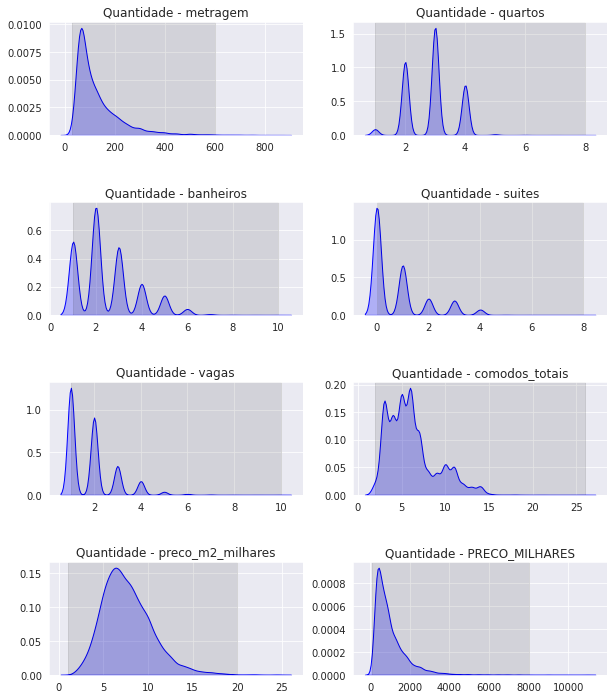

In [269]:
def plot_kde(df, col_x):
    # Grafico kde simples
    sns.kdeplot(col_x,
                data = df,
                shade = True,
                color = color)
    
    plt.title('Quantidade - {}'.format(col_x))
    
    # Eixo x
    plt.xlabel('')

    #Eixo y
    plt.ylabel('')

def plor_axvspan_nout(min_lim, max_lim):
    plt.axvspan(min_lim, max_lim,
                alpha= 0.1,
                color= 'black')

fig, ax = plt.subplots(figsize = (10,12))

plt.subplot(4, 2, 1)
plot_kde(data, 'metragem')
plor_axvspan_nout(30, 600)

plt.subplot(4, 2, 2)
plot_kde(data, 'quartos')
plor_axvspan_nout(1, 8) # Usei o range todo

plt.subplot(4, 2, 3)
plot_kde(data, 'banheiros')
plor_axvspan_nout(1, 10) # Usei o range todo

plt.subplot(4, 2, 4)
plot_kde(data, 'suites')
plor_axvspan_nout(0, 8) # Usei o range todo

plt.subplot(4, 2, 5)
plot_kde(data, 'vagas')
plor_axvspan_nout(1, 10) # Usei o range todo

plt.subplot(4, 2, 6)
plot_kde(data, 'comodos_totais')
plor_axvspan_nout(2, 26) # Usei o range todo

plt.subplot(4, 2, 7)
plot_kde(data, 'preco_m2_milhares')
plor_axvspan_nout(1, 20)

plt.subplot(4, 2, 8)
plot_kde(data, 'PRECO_MILHARES')
plor_axvspan_nout(100, 8000)

plt.subplots_adjust(hspace= 0.6)
plt.show()

#### 2.2.3 - Eliminando os outliers

In [270]:
def elimina_outlier(df, col, min, max):
    df = df[df[col] >= min]
    df = df[df[col] <= max]
    return df

data = elimina_outlier(data, 'metragem', 30, 600)
data = elimina_outlier(data, 'preco_m2_milhares', 1, 20)
data = elimina_outlier(data, 'PRECO_MILHARES', 100, 8000)

data.describe()

,metragem,quartos,banheiros,suites,vagas,PRECO_MILHARES,comodos_totais,preco_m2_milhares
count,15623.000000,15623.000000,15623.000000,15623.000000,15623.000000,15623.000000,15623.000000,15623.000000
mean,126.124816,2.855982,2.453818,0.751648,1.833323,979.821849,6.061448,7.644003
std,87.675606,0.777926,1.249771,1.053504,0.996793,808.978830,2.734449,2.746105
min,30.000000,1.000000,1.000000,0.000000,1.000000,100.000000,2.000000,1.408000
25%,65.000000,2.000000,2.000000,0.000000,1.000000,430.000000,4.000000,5.680000
50%,96.000000,3.000000,2.000000,0.000000,2.000000,745.000000,6.000000,7.273000
75%,158.000000,3.000000,3.000000,1.000000,2.000000,1250.000000,7.000000,9.255500
max,600.000000,7.000000,9.000000,5.000000,10.000000,8000.000000,21.000000,20.000000


### 2.3 - Eliminando threshold

1.   Os bairros com poucas amostra podem trazer um vies
2.   Analisei e escolhi 15 unidades minimas por bairros
3.   Eliminei e temos o dataframe final com 13.488 amostras

In [271]:
#times the neighborhood appears
data['n_threshold'] = data.groupby(['bairros']) \
                      ['PRECO_MILHARES'].transform('count')

#excluding by the minimum number of times
data = data[data['n_threshold'] > 15]
data.drop('n_threshold', axis= 1, inplace=True)

data

,bairros,metragem,quartos,banheiros,suites,vagas,PRECO_MILHARES,comodos_totais,preco_m2_milhares
0,bras,57,2,1,0,1,385.185,3,6.758
1,santa cecilia,430,4,3,0,5,3200.000,7,7.442
2,bras,57,2,1,0,1,410.000,3,7.193
3,santa cecilia,250,4,3,0,2,1200.000,7,4.800
4,consolacao,177,3,3,0,1,1390.000,6,7.853
...,...,...,...,...,...,...,...,...,...
15698,campo belo,160,4,5,3,3,1600.000,12,10.000
15699,indianopolis,533,5,5,4,4,4500.000,14,8.443
15700,real parque,267,3,5,3,3,980.000,11,3.670
15701,indianopolis,171,4,5,2,2,1700.000,11,9.942


## **3.0 - Analise exploratoria**

### 3.1 - Definicao do preco de venda

1.   Plotei os graficos das colunas vs valor de venda (3.1.1)
2.   Estudei com modelo RFR a importancia das features (3.1.2)
>    Criei o data_feat, so usado aqui, para manter o original   
>    Exclui preco/m2, pois deriva diretamente preco final
3.   Plotei uma figura com a correlacao das colunas (3.1.3)
4.   Ficou claro que metragem, bairro e vagas refletem no preco

#### 3.1.1 - Features vs Preco de venda

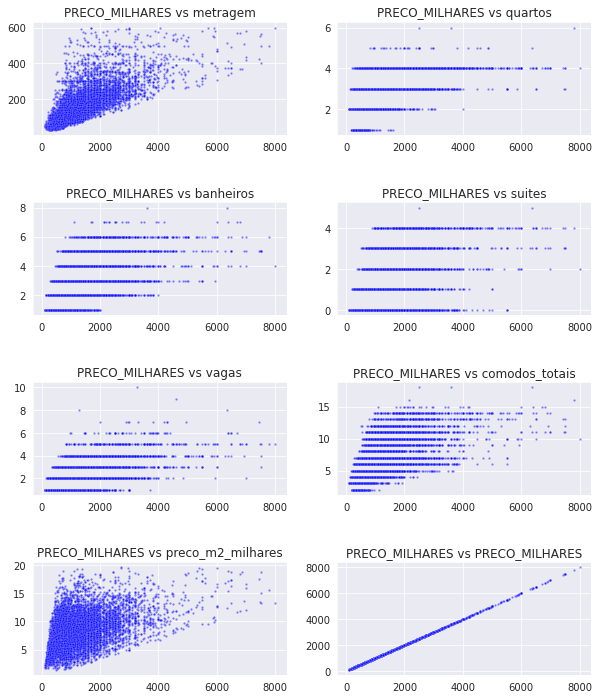

In [272]:
def plot_scatter(df, col_x, col_y):
    # Grafico scatter simples
    sns.scatterplot(col_x,
                    col_y,
                    data = df,
                    alpha = 0.5,
                    s = 5,
                    color = color)
    
    plt.title('{} vs {}'.format(col_x, col_y))
    
    # Eixo x
    plt.xlabel('')

    #Eixo y
    plt.ylabel('')

fig, ax = plt.subplots(figsize = (10,12))

plt.subplot(4, 2, 1)
plot_scatter(data, 'PRECO_MILHARES', 'metragem')

plt.subplot(4, 2, 2)
plot_scatter(data, 'PRECO_MILHARES', 'quartos')

plt.subplot(4, 2, 3)
plot_scatter(data, 'PRECO_MILHARES', 'banheiros')

plt.subplot(4, 2, 4)
plot_scatter(data, 'PRECO_MILHARES', 'suites')

plt.subplot(4, 2, 5)
plot_scatter(data, 'PRECO_MILHARES', 'vagas')

plt.subplot(4, 2, 6)
plot_scatter(data, 'PRECO_MILHARES', 'comodos_totais')

plt.subplot(4, 2, 7)
plot_scatter(data, 'PRECO_MILHARES', 'preco_m2_milhares')

plt.subplot(4, 2, 8)
plot_scatter(data, 'PRECO_MILHARES', 'PRECO_MILHARES')

plt.subplots_adjust(hspace= 0.6)
plt.show()

#### 3.1.2 - Feature importance com RFR

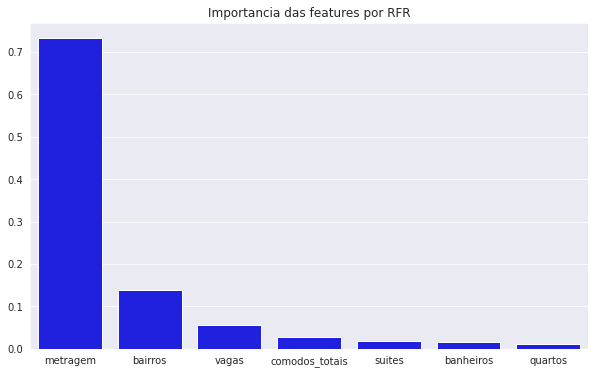

In [273]:
# Criando um datarframe novo igual ao principal
data_feat = data.copy().drop('preco_m2_milhares',
                             axis = 1)

# Preparando a coluna bairros para receber ML
le = preprocessing.LabelEncoder()
data_feat['bairros'] = le.fit_transform(data_feat['bairros'])

# Treinando o algoritmo RFR no dataframe novo
rfr = RandomForestRegressor(n_estimators = 1000)
rfr.fit(data_feat.drop(['PRECO_MILHARES'], axis= 1),
        data_feat['PRECO_MILHARES'])

# Descobrindo a importancia de cada feature
imp_feat = pd.DataFrame({'colunas':
                         data_feat.drop(['PRECO_MILHARES'],
                                              axis= 1).columns,
                         'importancia':
                         rfr.feature_importances_})
imp_feat = imp_feat.sort_values(by = 'importancia',
                                ascending = False)

def plot_bar(df, col_x, col_y, titulo):
    # Grafico barras simples
    sns.barplot(col_x,
                col_y,
                data = df,
                color = color)
    
    plt.title(titulo)
    
    #Eixo x
    plt.xlabel('')
    
    # Eixo y
    plt.ylabel('')

# Plot do dataframe gerado
fig, ax = plt.subplots(figsize = (10,6))

plot_bar(imp_feat, 'colunas', 'importancia',
         'Importancia das features por RFR')

plt.show()

#### 3.1.3 - Correlacao das colunas

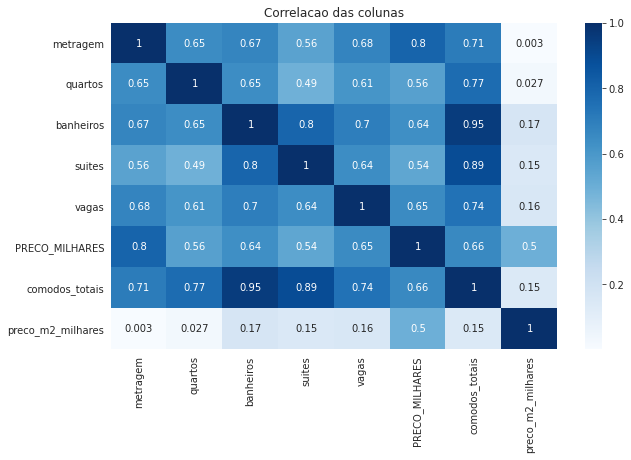

In [274]:
def plot_corr(df, titulo):
    # Grafico barras simples
    sns.heatmap(df.corr(), 
                annot= True,
                cmap = 'Blues')
    
    plt.title(titulo)
    
    #Eixo x
    plt.xlabel('')
    
    # Eixo y
    plt.ylabel('')

# Plot do dataframe gerado
fig, ax = plt.subplots(figsize = (10,6))

plot_corr(data, 'Correlacao das colunas')

plt.show()

### 3.2 - Hipoteses levantadas

#### Precos finais de venda por faixa de metragem

#### Bairros mais caros e mais baratos por categoria

## **6.0 - Avaliacao do modelo**

[Link do LinkedInNatalia Zaniboni](https://www.analyticsvidhya.com/blog/2020/11/a-tour-of-evaluation-metrics-for-machine-learning/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)